

# **Частица влетает в плоский конденсатор**
> Частица влетает в поле конденсатора параллельно пластинам вдоль оси конденсатора. Частица имеет массу  и заряд  (знак не определен). Под действием поля конденсатора частица отклоняется к одной из пластин (в зависимости от знака заряда) и к концу пути попадает на неё. Координату, где упала частица можно измерить. Известны также расстояние между пластинами и напряжение на конденсаторе.
Создать модель поведения частицы с возможностью изучения её траектории в зависимости от изменяемых параметров системы (масса, знак и модуль заряда частицы, расстояние между пластинами конденсатора, а также другие параметры являются входными данными для задачи).
Определить закон, по которому изменяется траектория движения частицы. Учесть влияние силы тяжести на частицу и визуализировать траекторию движения частицы в виде графика.




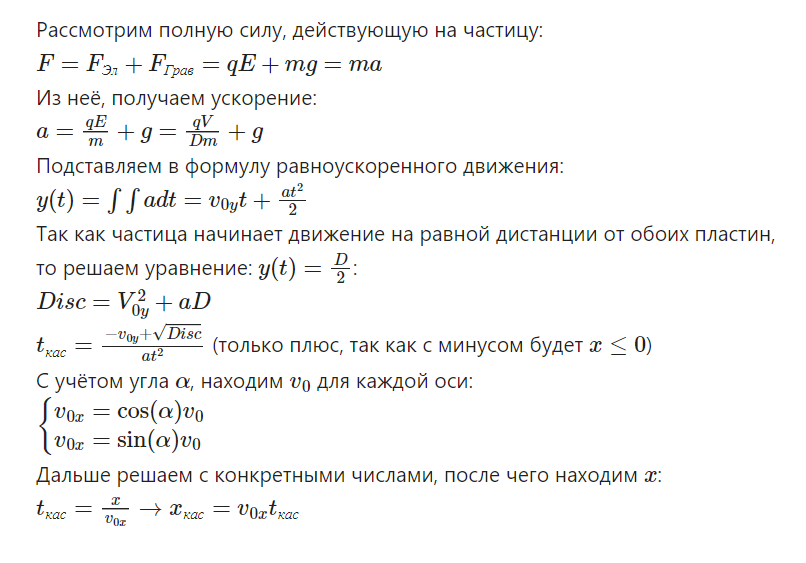

Введите 1, если хотите, чтобы заряд был положительный или -1, если хотите, чтобы заряд был отрицательный: -1
Заряд отрицательный, будет отклонятся к нижней пластине


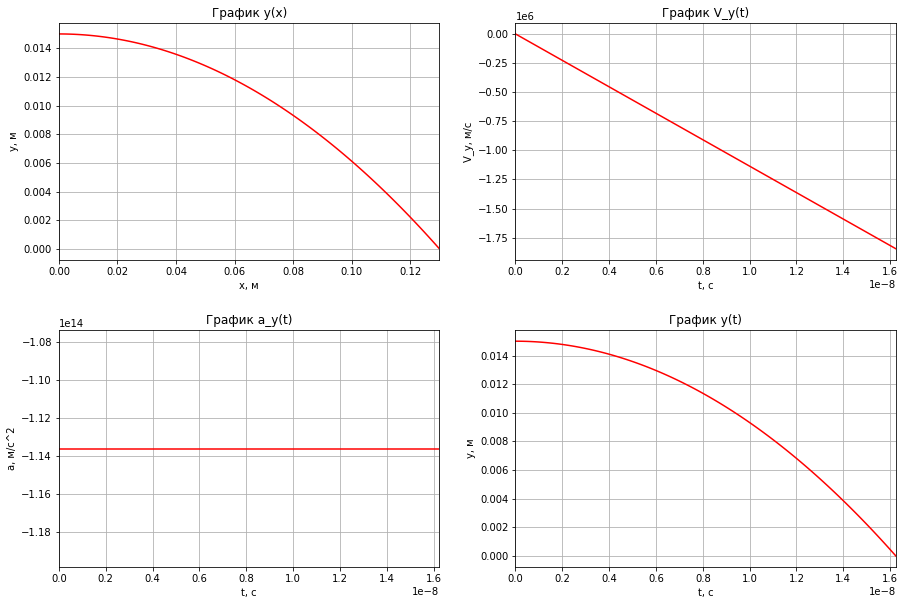

Минимальная разность потенциалов, при которой электрон не успеет вылететь из конденсатора = -19.385 В
Время полёта = 1.625e-08 с
Конечная скорость = 8210263.045 м/с


In [ ]:
import matplotlib.pyplot as plt
from math import sqrt, sin, cos, atan

# Начальные значения
V_0 = 8e6
L = 13

# Константы для электрона
m = 9.1e-31
put = int(input("Введите 1, если хотите, чтобы заряд был положительный или -1, если хотите, чтобы заряд был отрицательный: "))
if put >= 1:
  q = 1.6e-19
  print("Заряд положительный, будет отклонятся к верхней пластине")
else:
  q = -(1.6e-19)
  print("Заряд отрицательный, будет отклонятся к нижней пластине")

# Перевод в СИ
L /= 100

t = L / V_0
n = 100
r = 2
R = 5
r /= 100
R /= 100
U_min = round(((R - r) ** 2 * m) / (q * t ** 2), 3)

# вычисления
def estimate(t, n, R, r, q, m, U=-U_min):
    dt = t / n
    T = [dt * i for i in range(n + 1)]
    a_y = [(q * U) / ((R - r) * m)] * (n + 1)
    x = [T[i] * V_0 for i in range(n + 1)]
    V_y = [a_y[i] * T[i] for i in range(n + 1)]

    y = []
    for i in range(n + 1):
        y.append((R - r) / 2 + (a_y[i] * T[i] ** 2) / 2)
        if y[i] >= 0.03:
            T = T[:i + 1]
            a_y = a_y[:i + 1]
            x = x[:i + 1]
            V_y = V_y[:i + 1]
            break

    V_end = sqrt(V_0 ** 2 + V_y[len(V_y) - 1] ** 2)
    return T, a_y, x, V_y, y, V_end


U = U_min

T, a_y, x, V_y, y, V_end = estimate(t, n, R, r, q, m)

# построение графиков
def build_plots(x, y, T, V_y, a_y):
    plots = [["График y(x)", x, y, "x, м", "y, м"],
             ["График V_y(t)", T, V_y, "t, c", "V_y, м/с"],
             ["График a_y(t)", T, a_y, "t, c", "a, м/с^2"],
             ["График y(t)", T, y, "t, c", "y, м"]]

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    axs = [ax[i, j] for i in range(2) for j in range(2)]
    plt.subplots_adjust(hspace=0.3)

    for i in range(4):
        axs[i].grid(True)
        axs[i].set_xlabel(plots[i][3])
        axs[i].set_ylabel(plots[i][4])
        axs[i].set_xlim([plots[i][1][0], plots[i][1][len(y) - 1]])
        axs[i].set_title(plots[i][0])
        axs[i].plot(plots[i][1], plots[i][2], color='red')

    plt.show()
build_plots(x, y, T, V_y, a_y)
print("Минимальная разность потенциалов, при которой электрон не успеет вылететь из конденсатора = " + str(U_min) + " В")
print("Время полёта = " + str(T[len(T) - 1]) + " с")
print("Конечная скорость = " + str(round(V_end, 3)) + " м/с")
